In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
df1=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_강원.csv",encoding="cp949")

In [5]:
df1=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_강원.csv",encoding="cp949")
df2=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_경기.csv",encoding="cp949")
df3=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_경남.csv",encoding="cp949")
df4=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_경북.csv",encoding="cp949")
df5=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_광주.csv",encoding="cp949")
df6=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_대구.csv",encoding="cp949")
df7=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_대전.csv",encoding="cp949")
df8=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_부산.csv",encoding="cp949")
df9=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_서울.csv",encoding="cp949")
df10=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_세종.csv",encoding="cp949")
df11=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_울산.csv",encoding="cp949")
df12=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_인천.csv",encoding="cp949")
df13=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_전남.csv",encoding="cp949")
df14=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_전북.csv",encoding="cp949")
df15=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_제주.csv",encoding="cp949")
df16=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_충남.csv",encoding="cp949")
df17=pd.read_csv("C:/Users/user/Desktop/TAAS_데이터/201023_배포버전/빅데이터인턴분석자료통합버전_충북.csv",encoding="cp949")

In [6]:
data=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17])

In [7]:
len(data)

1116035

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116035 entries, 0 to 47155
Data columns (total 58 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   사고번호          1116035 non-null  int64 
 1   발생일시          1116035 non-null  int64 
 2   발생지_시도        1116035 non-null  object
 3   발생지_시군구       1116035 non-null  object
 4   법정동코드         1116035 non-null  int64 
 5   요일            1116035 non-null  object
 6   주야            1116035 non-null  object
 7   사고내용          1116035 non-null  object
 8   사고유형_대분류      1116035 non-null  object
 9   사고유형_중분류      1116035 non-null  object
 10  사고유형          1116035 non-null  object
 11  가해자성별         1116035 non-null  object
 12  피해자성별         1116035 non-null  object
 13  연령가해자         1116035 non-null  object
 14  연령피해자         1116035 non-null  object
 15  가해자음주_대분류     1116035 non-null  object
 16  가해자음주         1116035 non-null  object
 17  보호장구가해자_대분류   1116035 non-null  object
 18  보호장구

### < 데이터 전처리 >

In [9]:
data["가해자음주_대분류"].unique()

array(['기타불명', '음주운전', '측정불능', '해당 없음', '음주상태'], dtype=object)

In [10]:
data["가해자음주"].unique()

array(['기타불명', '0.05%~0.09%', '0.15%~0.19%', '0.10%~0.14%', '0.35%이상',
       '0.20%~0.24%', '측정불응', '0.25%~0.29%', '0.30%~0.34%', '측정불능',
       '해당 없음', '0.03%미만', '0.030~0.049%'], dtype=object)

In [11]:
ch1=data[data["가해자음주_대분류"]=="음주운전"]
ch1["가해자음주"].unique()

array(['0.05%~0.09%', '0.15%~0.19%', '0.10%~0.14%', '0.35%이상',
       '0.20%~0.24%', '측정불응', '0.25%~0.29%', '0.30%~0.34%',
       '0.030~0.049%'], dtype=object)

In [12]:
ch2=data[data["가해자음주_대분류"]=="음주상태"]
ch2["가해자음주"].unique()

array(['0.03%미만', '0.030~0.049%'], dtype=object)

In [13]:
ch3=data[data["가해자음주_대분류"]=="해당 없음"]
ch3["가해자음주"].unique()

array(['해당 없음'], dtype=object)

In [14]:
# term_1 = data[(data["가해자음주"]=='0.03%미만') | (data["가해자음주"]=='기타불명') | (data["가해자음주"]=='측정불능') | (data["가해자음주"]=='해당 없음')| (data["가해자음주"]=='측정불응')].index

In [15]:
# alcohol=data.drop(term_1)

In [16]:
data1=data[data["가해자음주"]!="0.03%미만"]
data2=data1[data1["가해자음주"]!="기타불명"]
data3=data2[data2["가해자음주"]!="측정불능"]
data4=data3[data3["가해자음주"]!="해당 없음"]

In [17]:
alcohol=data4

In [18]:
print(len(data))
print(len(alcohol))

1116035
99939


In [19]:
alcohol["가해자음주_대분류"].unique()

array(['음주운전', '음주상태'], dtype=object)

In [20]:
alcohol["가해자음주"].unique()

array(['0.05%~0.09%', '0.15%~0.19%', '0.10%~0.14%', '0.35%이상',
       '0.20%~0.24%', '측정불응', '0.25%~0.29%', '0.30%~0.34%',
       '0.030~0.049%'], dtype=object)

In [21]:
pick_float=[]
pick_float2=[]

for i in alcohol["연령피해자"]:
    pick_float=re.findall("[0-9.]+",i)
    pick_float2+=pick_float
    
pick_float3=pd.Series(pick_float2)

pick_float3=pd.Series(pick_float2)
alcohol["연령피해자"]=pick_float3
alcohol["연령피해자"]=pd.to_numeric(alcohol["연령피해자"])

In [22]:
alcohol["발생년"]=0
alcohol["발생월"]=0
alcohol["발생시간"]=0

In [23]:
alcohol=alcohol.reset_index()

In [24]:
for i in range(len(alcohol)):
    alcohol["발생년"][i]=str(alcohol["발생일시"][i])[:4]

In [25]:
for i in range(len(alcohol)):
    alcohol["발생월"][i]=str(alcohol["발생일시"][i])[4:6]

In [26]:
for i in range(len(alcohol)):
    alcohol["발생시간"][i]=str(alcohol["발생일시"][i])[8:]

### < 데이터 시각화 >

In [27]:
print(len(alcohol[alcohol["노인보호구역_여부"]=="예"]))
print(len(alcohol[alcohol["노인보호구역_여부"]=="아니오"]))

18
99921


In [28]:
print(len(alcohol[alcohol["어린이보호구역_여부"]=="예"]))
print(len(alcohol[alcohol["어린이보호구역_여부"]=="아니오"]))

182
99757


In [29]:
print(len(alcohol[alcohol["자전거도로_여부"]=="예"]))
print(len(alcohol[alcohol["자전거도로_여부"]=="아니오"]))

19
60043


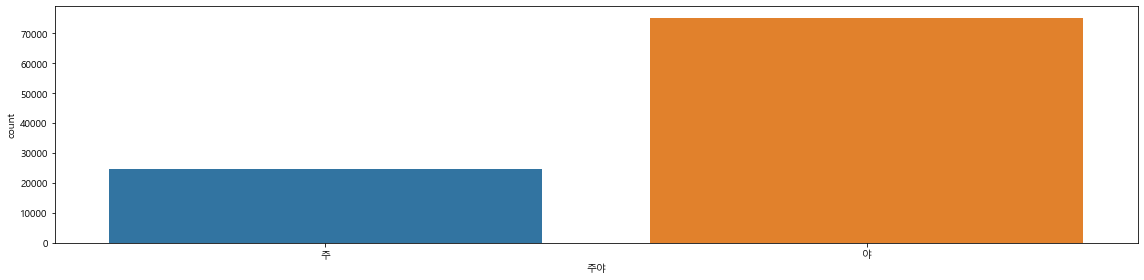

In [30]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('주야',data=alcohol, ax=ax1)
plt.tight_layout()

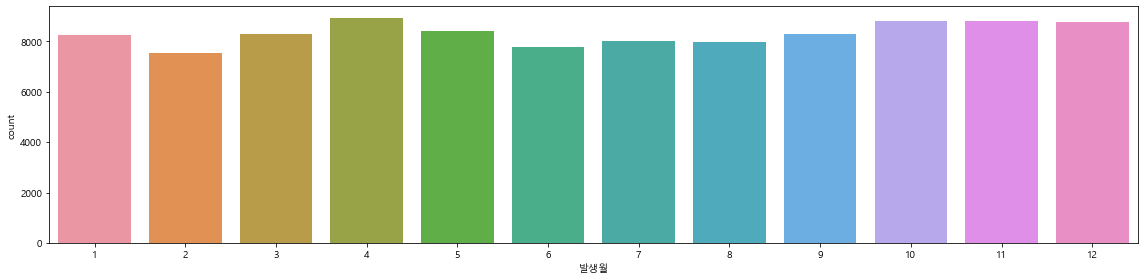

In [31]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('발생월',data=alcohol, ax=ax1)
plt.tight_layout()

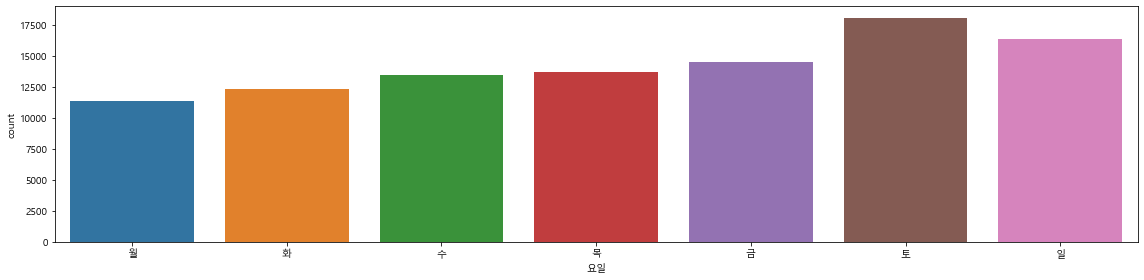

In [32]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('요일',data=alcohol, ax=ax1,order = ['월','화','수','목','금','토','일'])
plt.tight_layout()

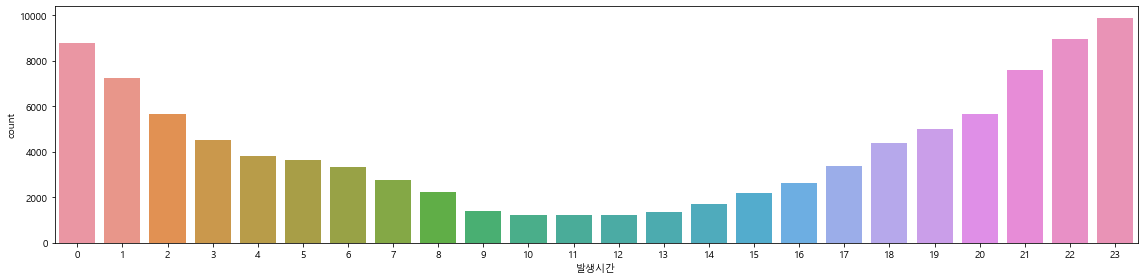

In [33]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('발생시간',data=alcohol, ax=ax1)
plt.tight_layout()

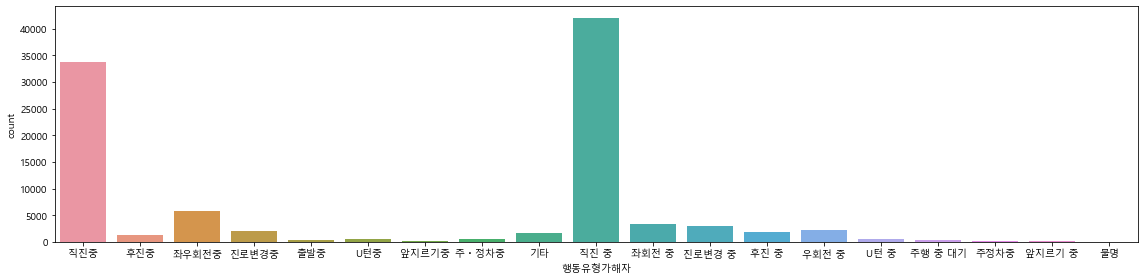

In [34]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('행동유형가해자',data=alcohol, ax=ax1)
plt.tight_layout()

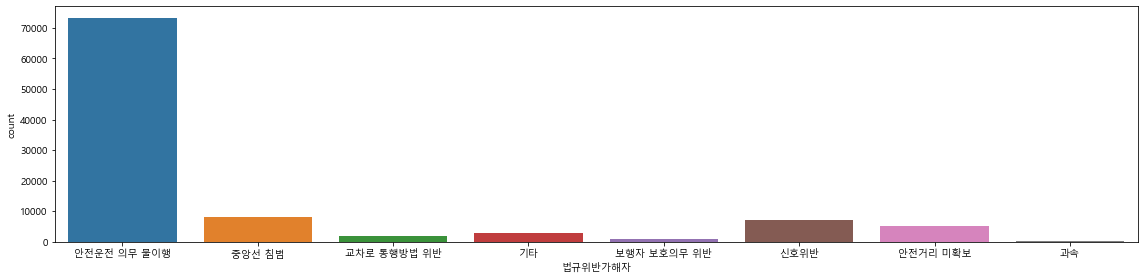

In [35]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('법규위반가해자',data=alcohol, ax=ax1)
plt.tight_layout()

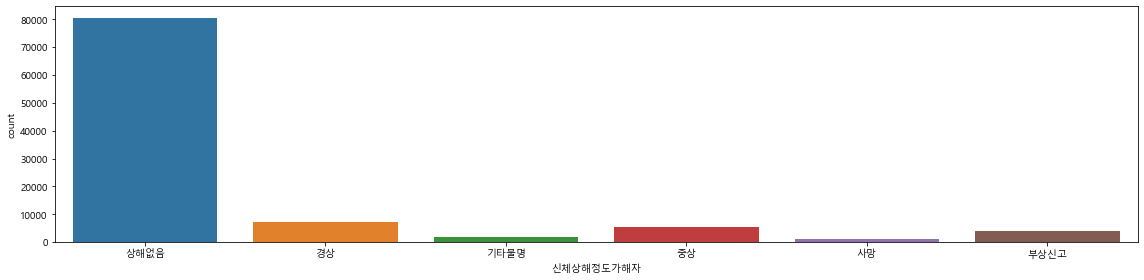

In [36]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('신체상해정도가해자',data=alcohol, ax=ax1)
plt.tight_layout()

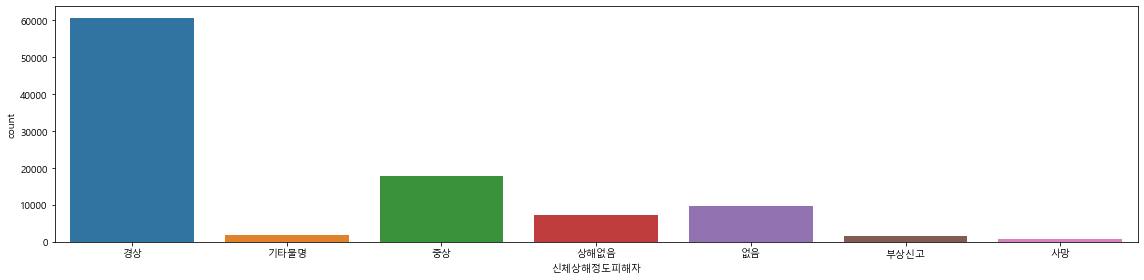

In [37]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('신체상해정도피해자',data=alcohol, ax=ax1)
plt.tight_layout()

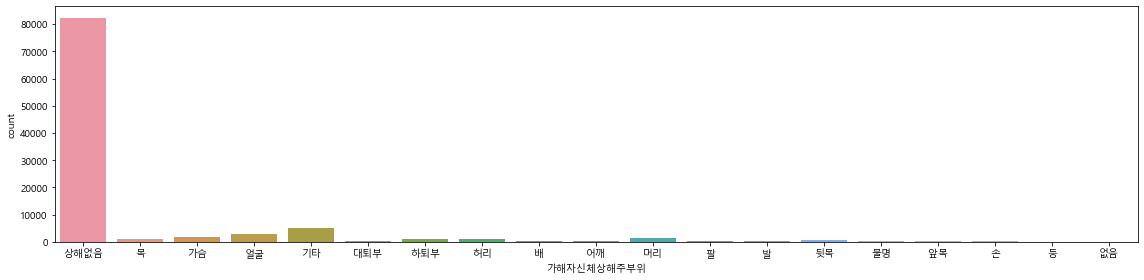

In [38]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('가해자신체상해주부위',data=alcohol, ax=ax1)
plt.tight_layout()

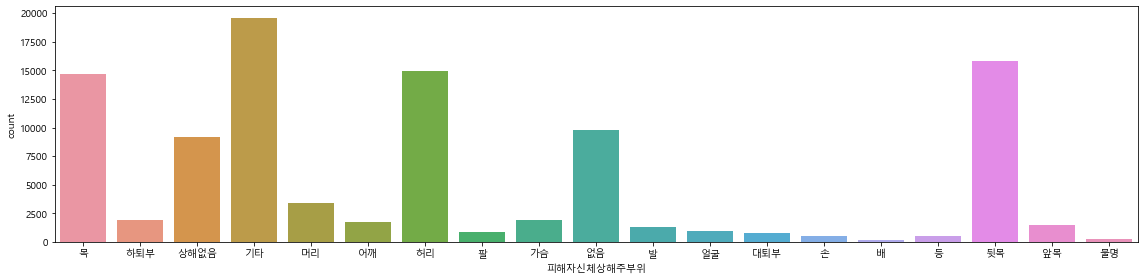

In [39]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('피해자신체상해주부위',data=alcohol, ax=ax1)
plt.tight_layout()

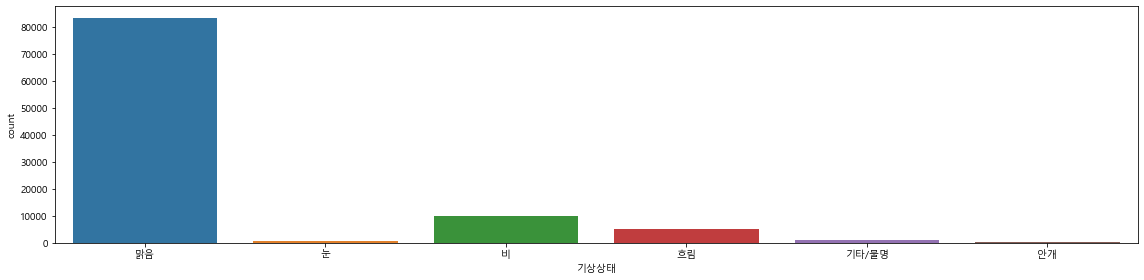

In [40]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('기상상태',data=alcohol, ax=ax1)
plt.tight_layout()

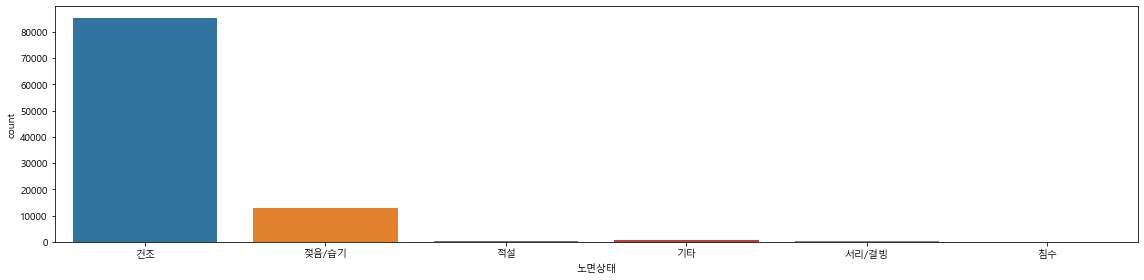

In [41]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('노면상태',data=alcohol, ax=ax1)
plt.tight_layout()

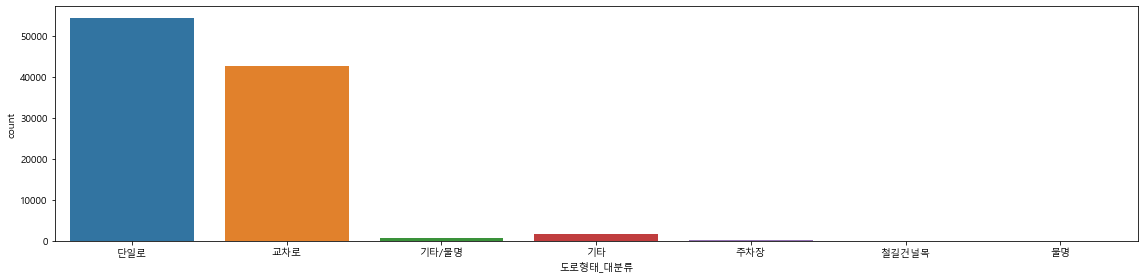

In [42]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('도로형태_대분류',data=alcohol, ax=ax1)
plt.tight_layout()

In [43]:
도로형태=alcohol["도로형태"].unique()

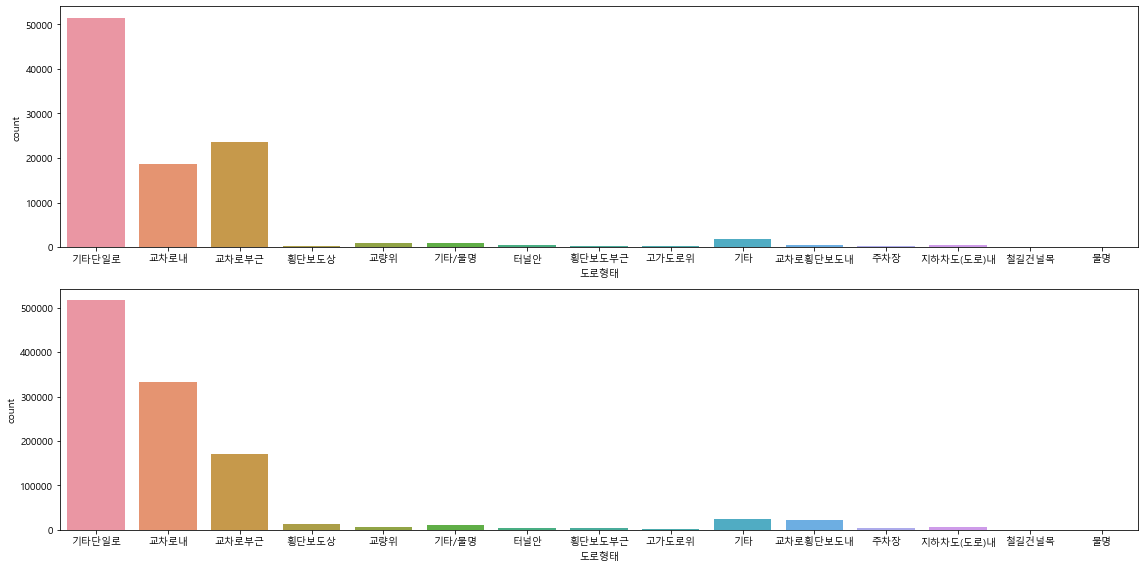

In [44]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16,8))
sns.countplot('도로형태',data=alcohol, ax=ax1, order =도로형태)
plt.tight_layout()

sns.countplot('도로형태',data=data, ax=ax2, order =도로형태)
plt.tight_layout()

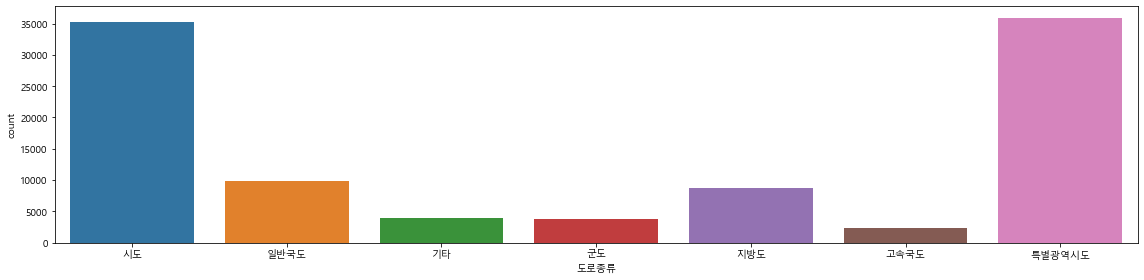

In [45]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('도로종류',data=alcohol, ax=ax1)
plt.tight_layout()

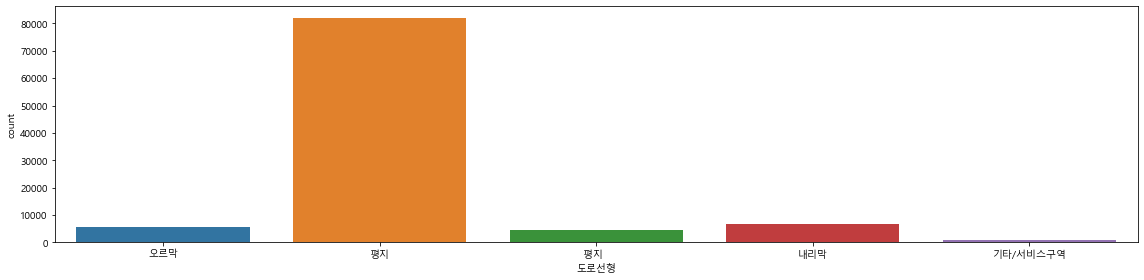

In [46]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('도로선형',data=alcohol, ax=ax1)
plt.tight_layout()

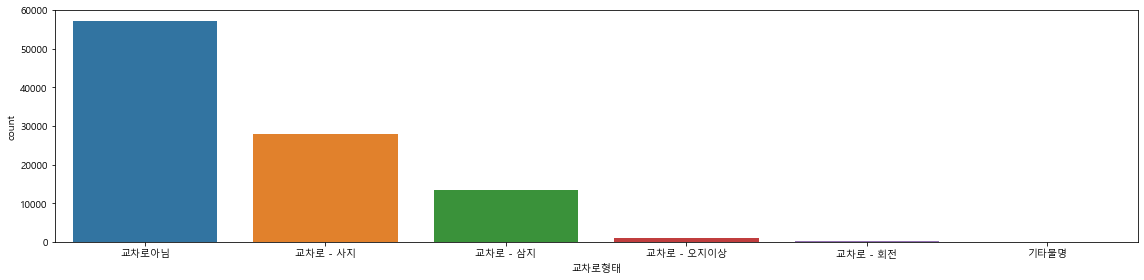

In [47]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('교차로형태',data=alcohol, ax=ax1)
plt.tight_layout()

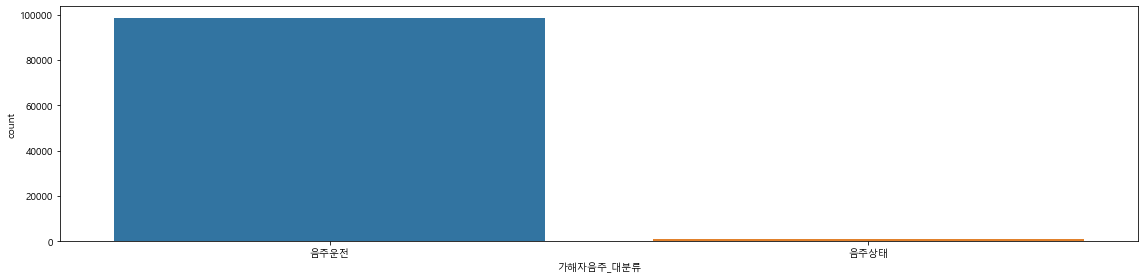

In [48]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('가해자음주_대분류',data=alcohol, ax=ax1)
plt.tight_layout()

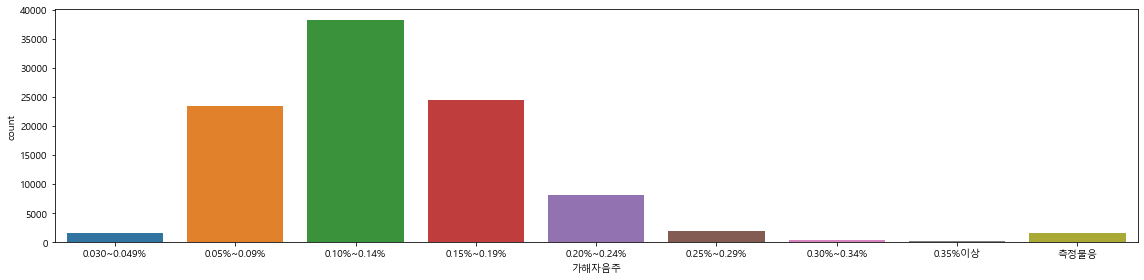

In [49]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('가해자음주',data=alcohol, ax=ax1,order = [
'0.030~0.049%',
'0.05%~0.09%',
'0.10%~0.14%',
'0.15%~0.19%',
'0.20%~0.24%',
'0.25%~0.29%',
'0.30%~0.34%',
'0.35%이상','측정불응'])
plt.tight_layout()

In [78]:
x=alcohol[alcohol["가해자음주"]=="0.10%~0.14%"]

In [50]:
a1=alcohol[alcohol["가해자음주"]=="0.030~0.049%"]
a2=alcohol[alcohol["가해자음주"]=="0.05%~0.09%"]
a3=alcohol[alcohol["가해자음주"]=="0.10%~0.14%"]
a4=alcohol[alcohol["가해자음주"]=="0.15%~0.19%"]
a5=alcohol[alcohol["가해자음주"]=="0.20%~0.24%"]
a6=alcohol[alcohol["가해자음주"]=="0.25%~0.29%"]
a7=alcohol[alcohol["가해자음주"]=="0.30%~0.34%"]
a8=alcohol[alcohol["가해자음주"]=="0.35%이상"]
a9=alcohol[alcohol["가해자음주"]=="측정불응"]

In [51]:
상해정도=a1["신체상해정도피해자"].unique()

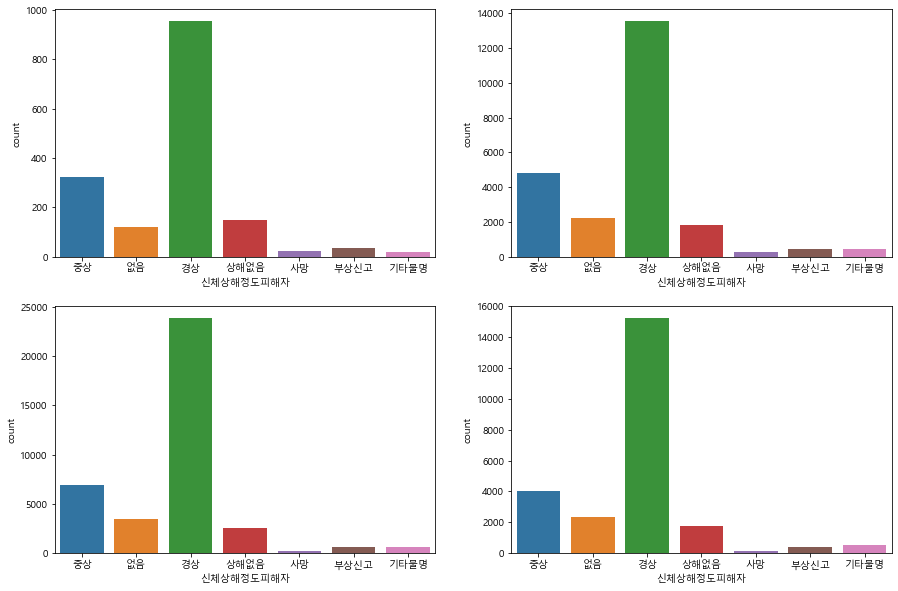

In [52]:
fig, axes = plt.subplots(2,2)

sns.countplot( '신체상해정도피해자',data=a1,order=상해정도,ax=axes[0][0])
sns.countplot( '신체상해정도피해자',data=a2,order=상해정도,ax=axes[0][1])
sns.countplot( '신체상해정도피해자',data=a3,order=상해정도,ax=axes[1][0])
sns.countplot( '신체상해정도피해자',data=a4,order=상해정도,ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

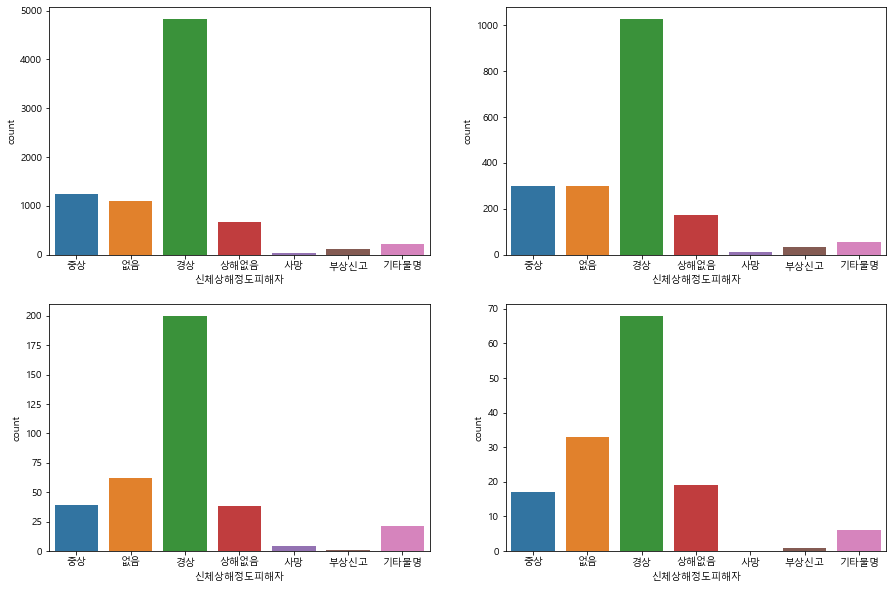

In [53]:
fig, axes = plt.subplots(2,2)

sns.countplot( '신체상해정도피해자',data=a5,order=상해정도,ax=axes[0][0])
sns.countplot( '신체상해정도피해자',data=a6,order=상해정도,ax=axes[0][1])
sns.countplot( '신체상해정도피해자',data=a7,order=상해정도,ax=axes[1][0])
sns.countplot( '신체상해정도피해자',data=a8,order=상해정도,ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

In [54]:
alcohol["사고심각도"]=0

In [55]:
for i in range(len(alcohol)):
    alcohol["사고심각도"][i]=((alcohol["사망자수"][i])*12)+((alcohol["중상자수"][i])*3)+((alcohol["경상자수"][i])*1)

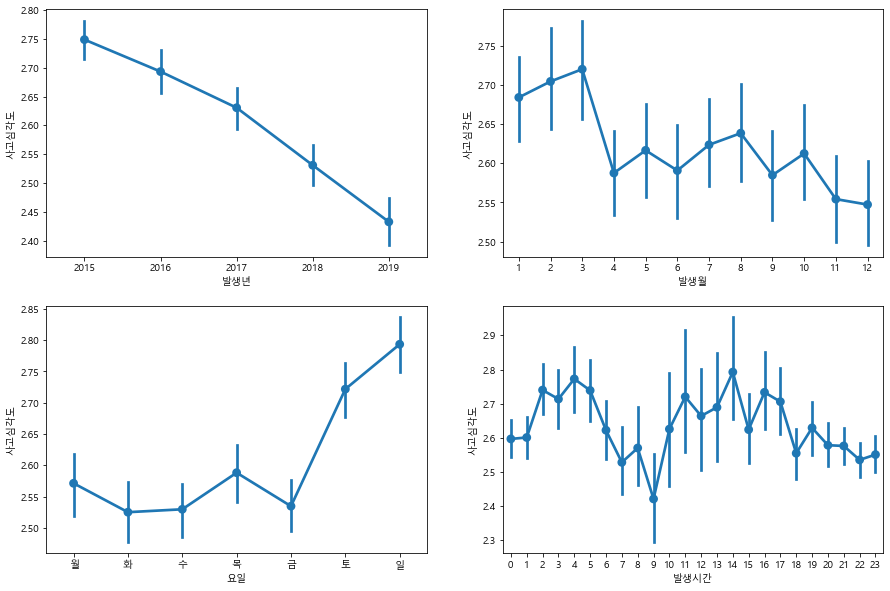

In [56]:
fig, axes = plt.subplots(2,2)

sns.pointplot(x='발생년',y='사고심각도', data=alcohol, ax=axes[0][0])
sns.pointplot(x='발생월',y='사고심각도', data=alcohol, ax=axes[0][1])
sns.pointplot(x='요일',y='사고심각도', data=alcohol,order=["월","화","수","목","금","토","일"] ,ax=axes[1][0])
sns.pointplot(x='발생시간',y='사고심각도', data=alcohol, ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

In [57]:
a1=alcohol[alcohol["요일"]=="목"]
a2=alcohol[alcohol["요일"]=="금"]
a3=alcohol[alcohol["요일"]=="토"]
a4=alcohol[alcohol["요일"]=="일"]

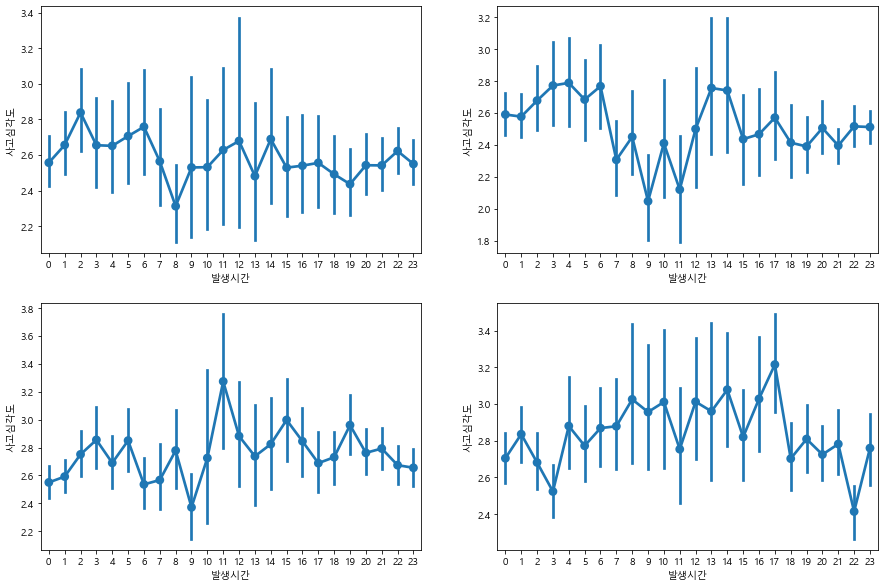

In [58]:
fig, axes = plt.subplots(2,2)

sns.pointplot(x='발생시간',y='사고심각도', data=a1, ax=axes[0][0])
sns.pointplot(x='발생시간',y='사고심각도', data=a2, ax=axes[0][1])
sns.pointplot(x='발생시간',y='사고심각도', data=a3 ,ax=axes[1][0])
sns.pointplot(x='발생시간',y='사고심각도', data=a4, ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

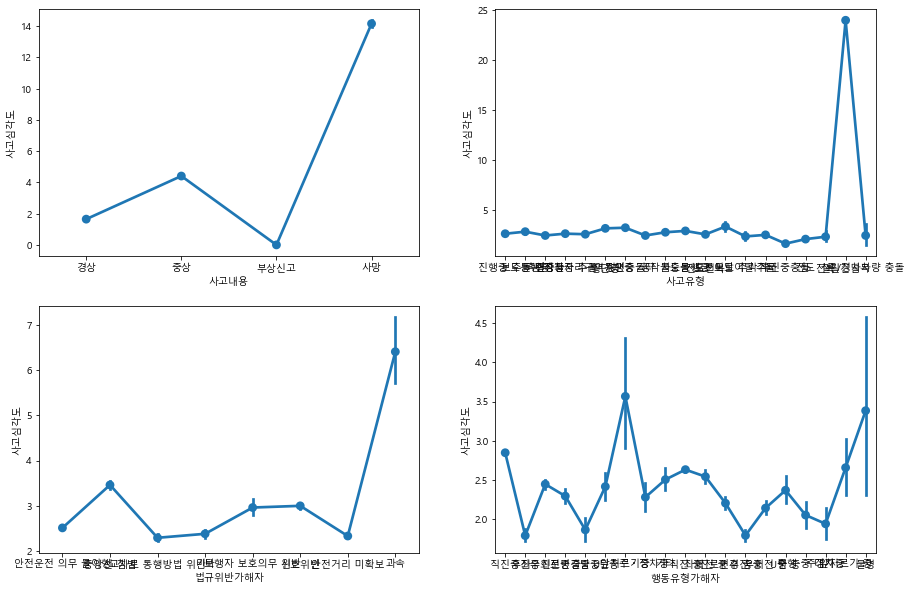

In [59]:
fig, axes = plt.subplots(2,2)

sns.pointplot(x='사고내용',y='사고심각도', data=alcohol, ax=axes[0][0])
sns.pointplot(x='사고유형',y='사고심각도', data=alcohol, ax=axes[0][1])
sns.pointplot(x='법규위반가해자',y='사고심각도', data=alcohol, ax=axes[1][0])
sns.pointplot(x='행동유형가해자',y='사고심각도', data=alcohol, ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

In [60]:
# fig, axes = plt.subplots(2,2)

# sns.pointplot(x='보호장구가해자',y='사고심각도', data=alcohol, ax=axes[0][0])
# sns.pointplot(x='보호장구피해자',y='사고심각도', data=alcohol, ax=axes[0][1])
# sns.pointplot(x='신체상해정도가해자',y='사고심각도', data=alcohol, ax=axes[1][0])
# sns.pointplot(x='신체상해정도피해자',y='사고심각도', data=alcohol, ax=axes[1][1])

# fig.set_size_inches(15,10)
# plt.show()

In [61]:
# fig, axes = plt.subplots(2,2)

# sns.pointplot(x='가해자신체상해주부위',y='사고심각도', data=alcohol, ax=axes[0][0])
# sns.pointplot(x='피해자신체상해주부위',y='사고심각도', data=alcohol, ax=axes[0][1])
# sns.pointplot(x='당사자종별가해자',y='사고심각도', data=alcohol, ax=axes[1][0])
# sns.pointplot(x='당사자종별피해자',y='사고심각도', data=alcohol, ax=axes[1][1])

# fig.set_size_inches(15,10)
# plt.show()

In [62]:
# fig, axes = plt.subplots(2,2)

# sns.pointplot(x='차량용도가해자',y='사고심각도', data=alcohol, ax=axes[0][0])
# sns.pointplot(x='도로선형',y='사고심각도', data=alcohol, ax=axes[0][1])
# sns.pointplot(x='도로종류',y='사고심각도', data=alcohol, ax=axes[1][0])
# sns.pointplot(x='도로형태',y='사고심각도', data=alcohol, ax=axes[1][1])

# fig.set_size_inches(15,10)
# plt.show()

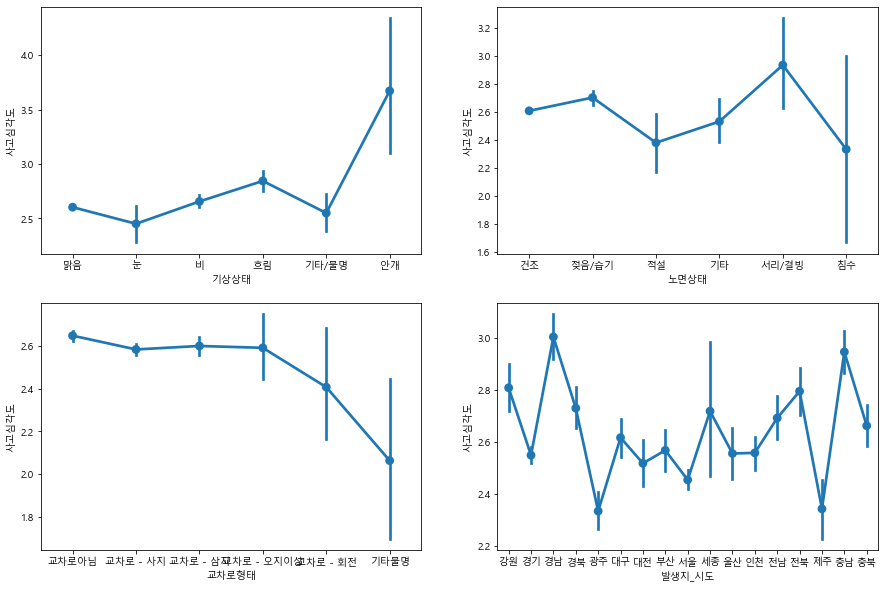

In [63]:
fig, axes = plt.subplots(2,2)

sns.pointplot(x='기상상태',y='사고심각도', data=alcohol, ax=axes[0][0])
sns.pointplot(x='노면상태',y='사고심각도', data=alcohol, ax=axes[0][1])
sns.pointplot(x='교차로형태',y='사고심각도', data=alcohol, ax=axes[1][0])
sns.pointplot(x='발생지_시도',y='사고심각도', data=alcohol, ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

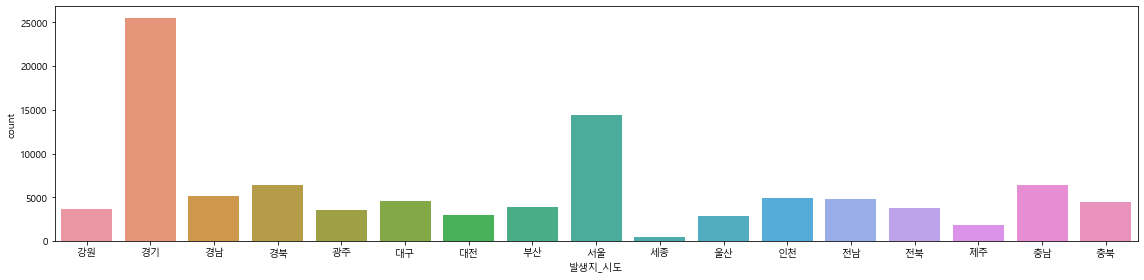

In [64]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('발생지_시도',data=alcohol, ax=ax1)
plt.tight_layout()

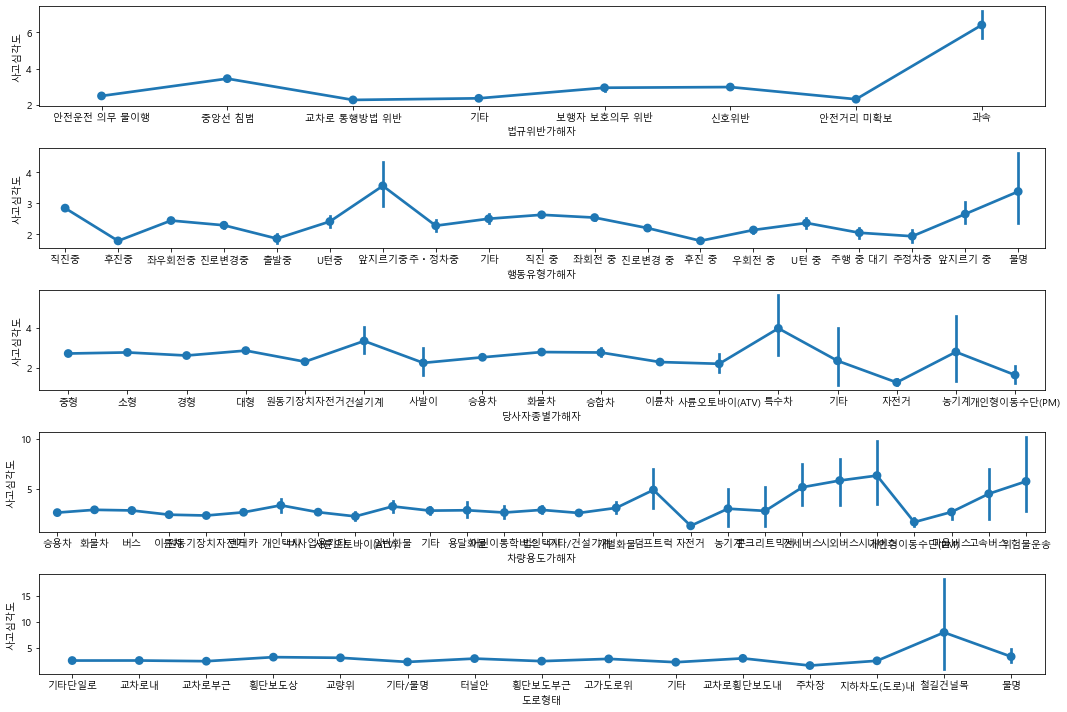

In [65]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(15,10))

sns.pointplot(x='법규위반가해자',y='사고심각도', data=alcohol, ax=ax1)
sns.pointplot(x='행동유형가해자',y='사고심각도', data=alcohol, ax=ax2)
sns.pointplot(x='당사자종별가해자',y='사고심각도', data=alcohol, ax=ax3)
sns.pointplot(x='차량용도가해자',y='사고심각도', data=alcohol, ax=ax4)
sns.pointplot(x='도로형태',y='사고심각도', data=alcohol, ax=ax5)

plt.tight_layout()
# fig.set_size_inches(15,15)
plt.show()

In [66]:
음주정도 = ['0.030~0.049%','0.05%~0.09%','0.10%~0.14%','0.15%~0.19%','0.20%~0.24%','0.25%~0.29%','0.30%~0.34%','0.35%이상','측정불응']

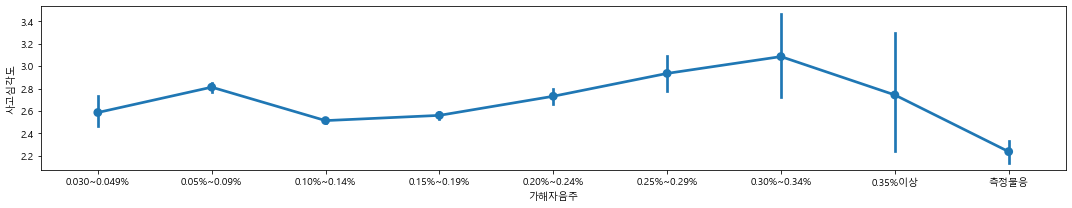

In [67]:
fig, (ax1) = plt.subplots(1,1,figsize=(15,3))

sns.pointplot(x='가해자음주',y='사고심각도', order=음주정도, data=alcohol, ax=ax1)

plt.tight_layout()
plt.show()

In [68]:
alcohol.to_csv("alcohol.csv",encoding="cp949")

In [69]:
sample1=alcohol[alcohol["가해자음주"]=="0.35%이상"]

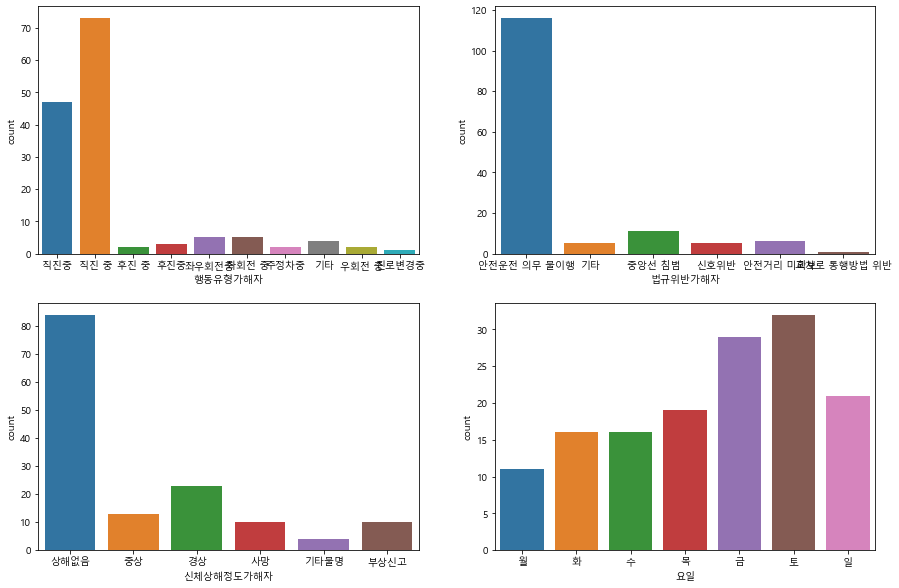

In [70]:
fig, axes = plt.subplots(2,2)

sns.countplot( '행동유형가해자',data=sample1,ax=axes[0][0])
sns.countplot( '법규위반가해자',data=sample1,ax=axes[0][1])
sns.countplot( '신체상해정도가해자',data=sample1,ax=axes[1][0])
sns.countplot( '요일',data=sample1,order=["월","화","수","목","금","토","일"],ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

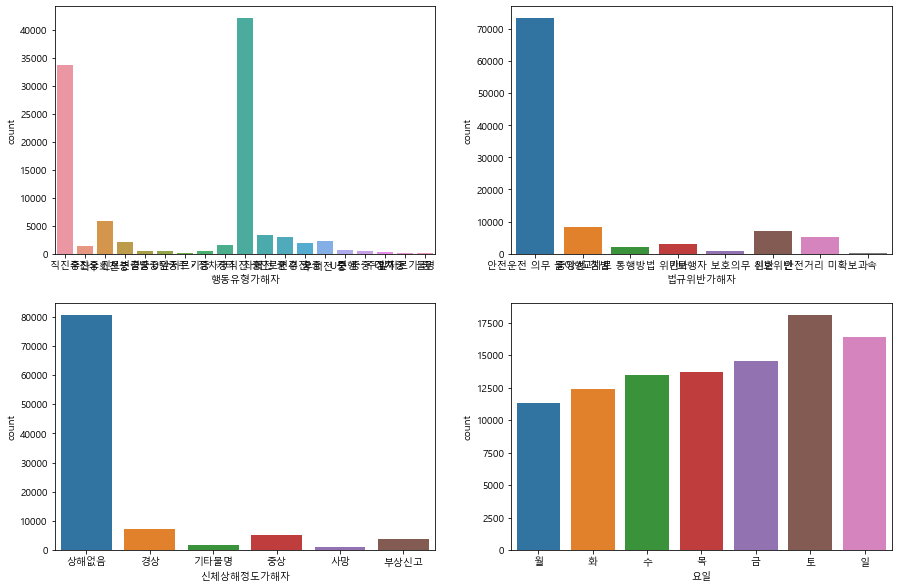

In [71]:
fig, axes = plt.subplots(2,2)

sns.countplot( '행동유형가해자',data=alcohol,ax=axes[0][0])
sns.countplot( '법규위반가해자',data=alcohol,ax=axes[0][1])
sns.countplot( '신체상해정도가해자',data=alcohol,ax=axes[1][0])
sns.countplot( '요일',data=alcohol,order=["월","화","수","목","금","토","일"],ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

In [72]:
alcohol["신체상해정도가해자"].unique()

array(['상해없음', '경상', '기타불명', '중상', '사망', '부상신고'], dtype=object)

In [73]:
alcohol["가해자피해심각도"]=0

In [74]:
for i in range(len(alcohol)):
    if (alcohol["신체상해정도가해자"][i]=="사망"):
        alcohol["가해자피해심각도"][i]=12
    elif (alcohol["신체상해정도가해자"][i]=="중상"):
        alcohol["가해자피해심각도"][i]=3
    elif (alcohol["신체상해정도가해자"][i]=="경상"):
        alcohol["가해자피해심각도"][i]=1
    else:
        alcohol["가해자피해심각도"][i]=0

In [75]:
alcohol["가해자피해심각도"].unique()

array([ 0,  1,  3, 12], dtype=int64)

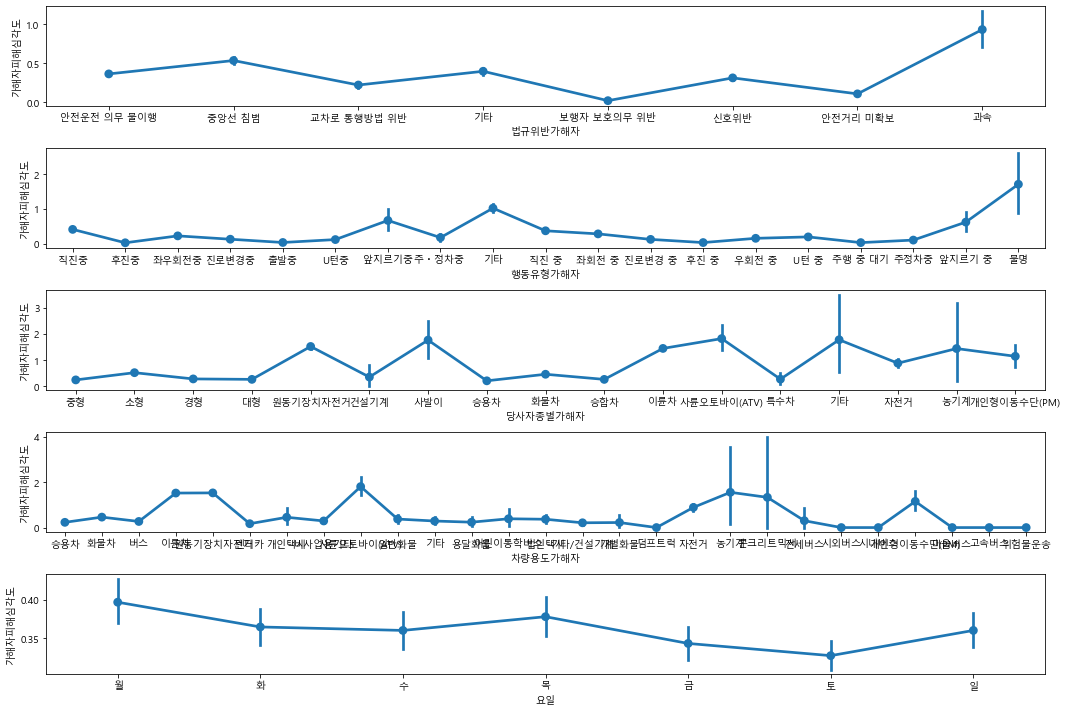

In [76]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(15,10))

sns.pointplot(x='법규위반가해자',y='가해자피해심각도', data=alcohol, ax=ax1)
sns.pointplot(x='행동유형가해자',y='가해자피해심각도', data=alcohol, ax=ax2)
sns.pointplot(x='당사자종별가해자',y='가해자피해심각도', data=alcohol, ax=ax3)
sns.pointplot(x='차량용도가해자',y='가해자피해심각도', data=alcohol, ax=ax4)
sns.pointplot(x='요일',y='가해자피해심각도',order=["월","화","수","목","금","토","일"], data=alcohol, ax=ax5)

plt.tight_layout()
# fig.set_size_inches(15,15)
plt.show()

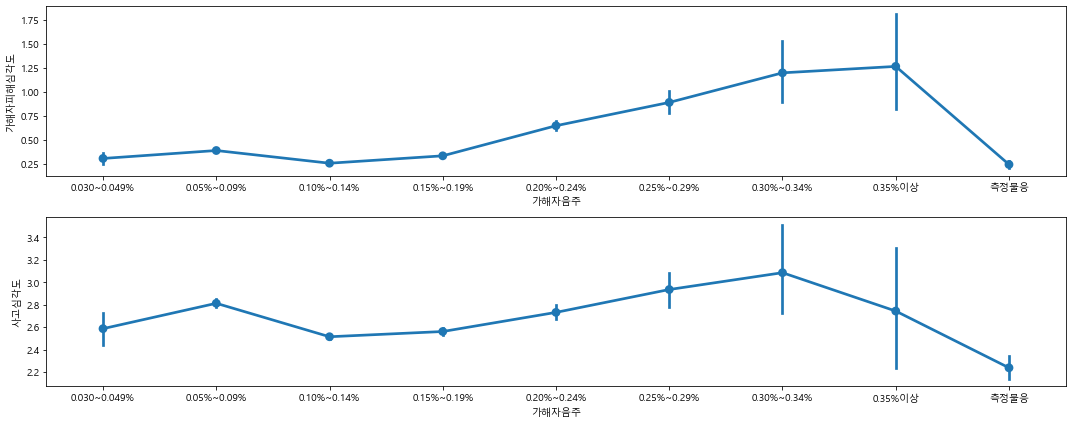

In [77]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,6))

sns.pointplot(x='가해자음주',y='가해자피해심각도', order=음주정도, data=alcohol, ax=ax1)
sns.pointplot(x='가해자음주',y='사고심각도', order=음주정도, data=alcohol, ax=ax2)

plt.tight_layout()
plt.show()

In [83]:
pick_float=[]
pick_float2=[]

for i in alcohol["연령가해자"]:
    pick_float=re.findall("[0-9.]+",i)
    pick_float2+=pick_float
    
pick_float3=pd.Series(pick_float2)

pick_float3=pd.Series(pick_float2)
alcohol["연령가해자"]=pick_float3
alcohol["연령가해자"]=pd.to_numeric(alcohol["연령가해자"])

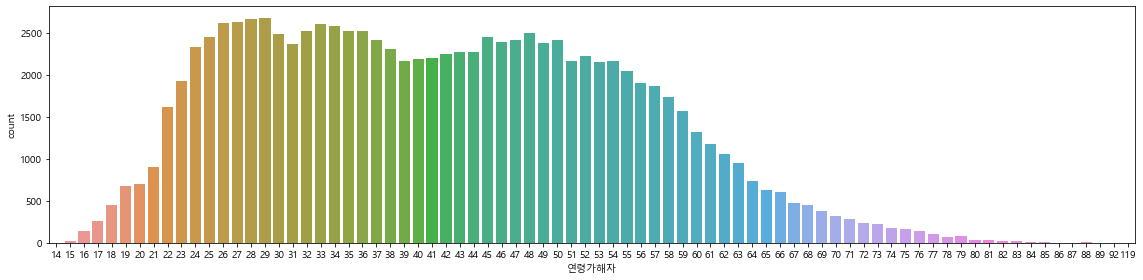

In [85]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('연령가해자',data=alcohol, ax=ax1)
plt.tight_layout()

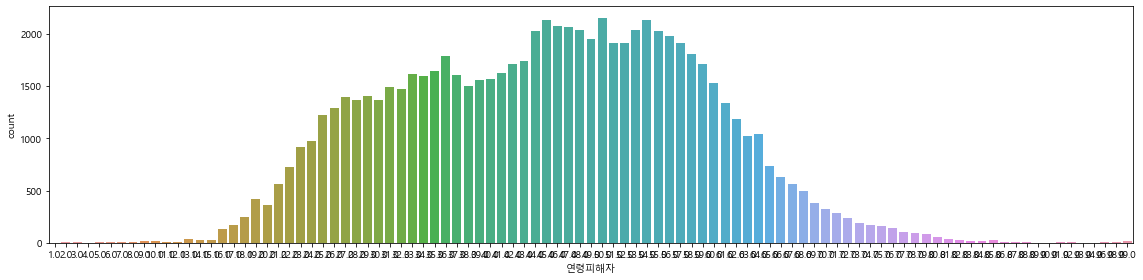

In [87]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('연령피해자',data=alcohol, ax=ax1)
plt.tight_layout()

In [88]:
alcohol["연령가해자"].unique()

array([ 54,  44,  55,  20,  29,  58,  50,  24,  22,  38,  52,  40,  49,
        53,  32,  23,  48,  36,  46,  60,  33,  51,  25,  31,  42,  41,
        39,  27,  45,  28,  56,  57,  47,  61,  26,  18,  16,  65,  43,
        37,  73,  59,  35,  30,  62,  34,  67,  66,  19,  69,  75,  21,
        71,  63,  72,  68,  64,  70,  17,  79,  74,  78,  76,  80,  77,
        81,  82,  15,  89,  84,  83,  85,  88,  14, 119,  92,  87,  86],
      dtype=int64)

In [93]:
alcohol["연령가해자_범위"]=0

In [95]:
for i in range(len(alcohol)):
    if (alcohol["연령가해자"][i]<20):
        alcohol["연령가해자_범위"][i]="10대"
    elif (alcohol["연령가해자"][i]>=20) & (alcohol["연령가해자"][i]<30) :
        alcohol["연령가해자_범위"][i]="20대"
    elif (alcohol["연령가해자"][i]>=30) & (alcohol["연령가해자"][i]<40) :
        alcohol["연령가해자_범위"][i]="30대"
    elif (alcohol["연령가해자"][i]>=40) & (alcohol["연령가해자"][i]<50) :
        alcohol["연령가해자_범위"][i]="40대"
    elif (alcohol["연령가해자"][i]>=50) & (alcohol["연령가해자"][i]<60) :
        alcohol["연령가해자_범위"][i]="50대"
    elif (alcohol["연령가해자"][i]>=60) :
        alcohol["연령가해자_범위"][i]="60대이상"

In [96]:
alcohol["연령가해자_범위"].unique()

array(['50대', '40대', '20대', '30대', '60대이상', '10대'], dtype=object)

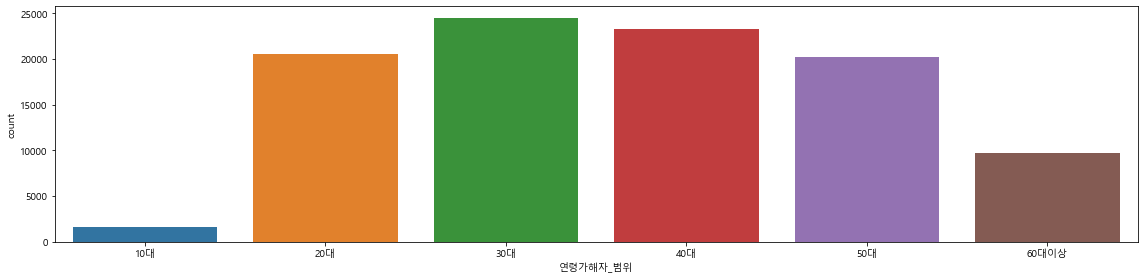

In [98]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('연령가해자_범위',order=["10대","20대","30대","40대","50대","60대이상"],data=alcohol, ax=ax1)
plt.tight_layout()

In [99]:
alcohol.columns

Index(['index', '사고번호', '발생일시', '발생지_시도', '발생지_시군구', '법정동코드', '요일', '주야',
       '사고내용', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자성별', '피해자성별', '연령가해자',
       '연령피해자', '가해자음주_대분류', '가해자음주', '보호장구가해자_대분류', '보호장구가해자', '보호장구피해자_대분류',
       '보호장구피해자', '법규위반가해자', '행동유형가해자_대분류', '행동유형가해자_중분류', '행동유형가해자',
       '신체상해정도가해자', '신체상해정도피해자', '가해자신체상해주부위', '피해자신체상해주부위', '당사자종별가해자_대분류',
       '당사자종별가해자', '당사자종별피해자_대분류', '당사자종별피해자', '차량용도가해자_대분류', '차량용도가해자_중분류',
       '차량용도가해자', '차량용도피해자_대분류', '차량용도피해자_중분류', '차량용도피해자', '도로종류', '도로형태_대분류',
       '도로형태', '노인보호구역_여부', '어린이보호구역_여부', '자전거도로_여부', '도로선형_대분류', '도로선형_중분류',
       '도로선형', '기상상태', '노면상태_대분류', '노면상태', '교차로형태_대분류', '교차로형태', '사망자수',
       '중상자수', '경상자수', '부상신고자수', '사고위치폴리곤', '발생년', '발생월', '발생시간', '사고심각도',
       '가해자피해심각도', '연령가해자_범위'],
      dtype='object')

In [100]:
alcohol["신체상해정도피해자"].unique()

array(['경상', '기타불명', '중상', '상해없음', '없음', '부상신고', '사망'], dtype=object)

In [101]:
b1=alcohol[alcohol["신체상해정도피해자"]=="사망"]

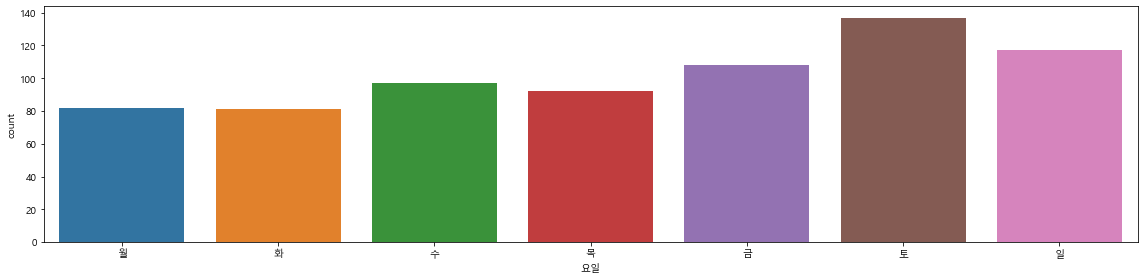

In [102]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('요일',order=["월","화","수","목","금","토","일"],data=b1, ax=ax1)
plt.tight_layout()

In [105]:
b2=data[data["신체상해정도피해자"]=="사망"]

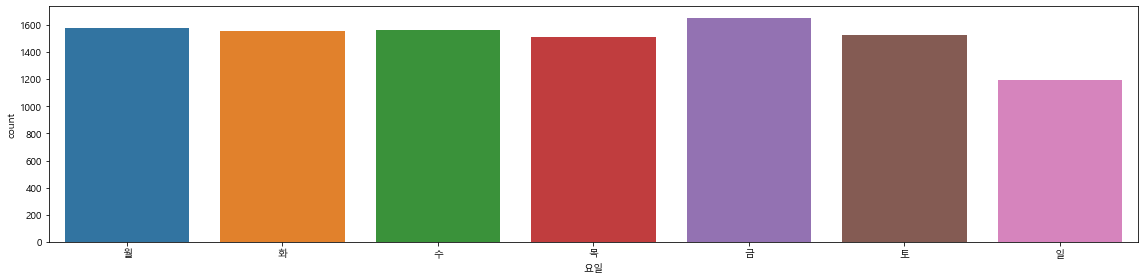

In [106]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,4))
sns.countplot('요일',order=["월","화","수","목","금","토","일"],data=b2, ax=ax1)
plt.tight_layout()

In [107]:
alcohol["요일"].unique()

array(['화', '수', '일', '금', '토', '월', '목'], dtype=object)

In [114]:
print((len(data[data["신체상해정도피해자"]=="사망"])/len(data))*1000)
print((len(alcohol[alcohol["신체상해정도피해자"]=="사망"])/len(alcohol))*1000)

9.470133105144551
7.144358058415634


In [115]:
print((len(data[data["신체상해정도가해자"]=="사망"])/len(data))*1000)
print((len(alcohol[alcohol["신체상해정도가해자"]=="사망"])/len(alcohol))*1000)

6.400336906996644
10.586457739220924


In [117]:
print(len(alcohol[alcohol["신체상해정도가해자"]=="중상"]))

5295
